# CS329 Machine Learning Assignment: Speaker Accent recognition Dataset.
### Student: U2056888

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

## PART 2: Determining if the dataset is Linearly Separable in the feature space defined by 2 Principal Components.

In [2]:
#Load Dataset
colnames=[ 'Y','X1','X2', 'X3', 'X4','X5','X6','X7','X8','X9','X10','X11','X12']
df = pd.read_csv('speakeraccentrecognitiondata.data', names=colnames, header=None)
df.head() 

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,ES,7.071476,-6.512900,7.650800,11.150783,-7.657312,12.484021,-11.709772,3.426596,1.462715,-2.812753,0.866538,-5.244274
1,ES,10.982967,-5.157445,3.952060,11.529381,-7.638047,12.136098,-12.036247,3.491943,0.595441,-4.508811,2.332147,-6.221857
2,ES,7.827108,-5.477472,7.816257,9.187592,-7.172511,11.715299,-13.847214,4.574075,-1.687559,-7.204041,-0.011847,-6.463144
3,ES,6.744083,-5.688920,6.546789,9.000183,-6.924963,11.710766,-12.374388,6.169879,-0.544747,-6.019237,1.358559,-6.356441
4,ES,5.836843,-5.326557,7.472265,8.847440,-6.773244,12.677218,-12.315061,4.416344,0.193500,-3.644812,2.151239,-6.816310


In [3]:
#center data (with target)
train_data = df.iloc[:: , 1:13]
means = df.iloc[:: , 1:13].mean()
train_data_s = train_data - means 
target = df["Y"]
train_data_s.insert(0, "Y", target)

In [4]:
#perform SVD decomposition
values = train_data_s.drop(columns=['Y'])
U, S, VT = np.linalg.svd(values, full_matrices=True)

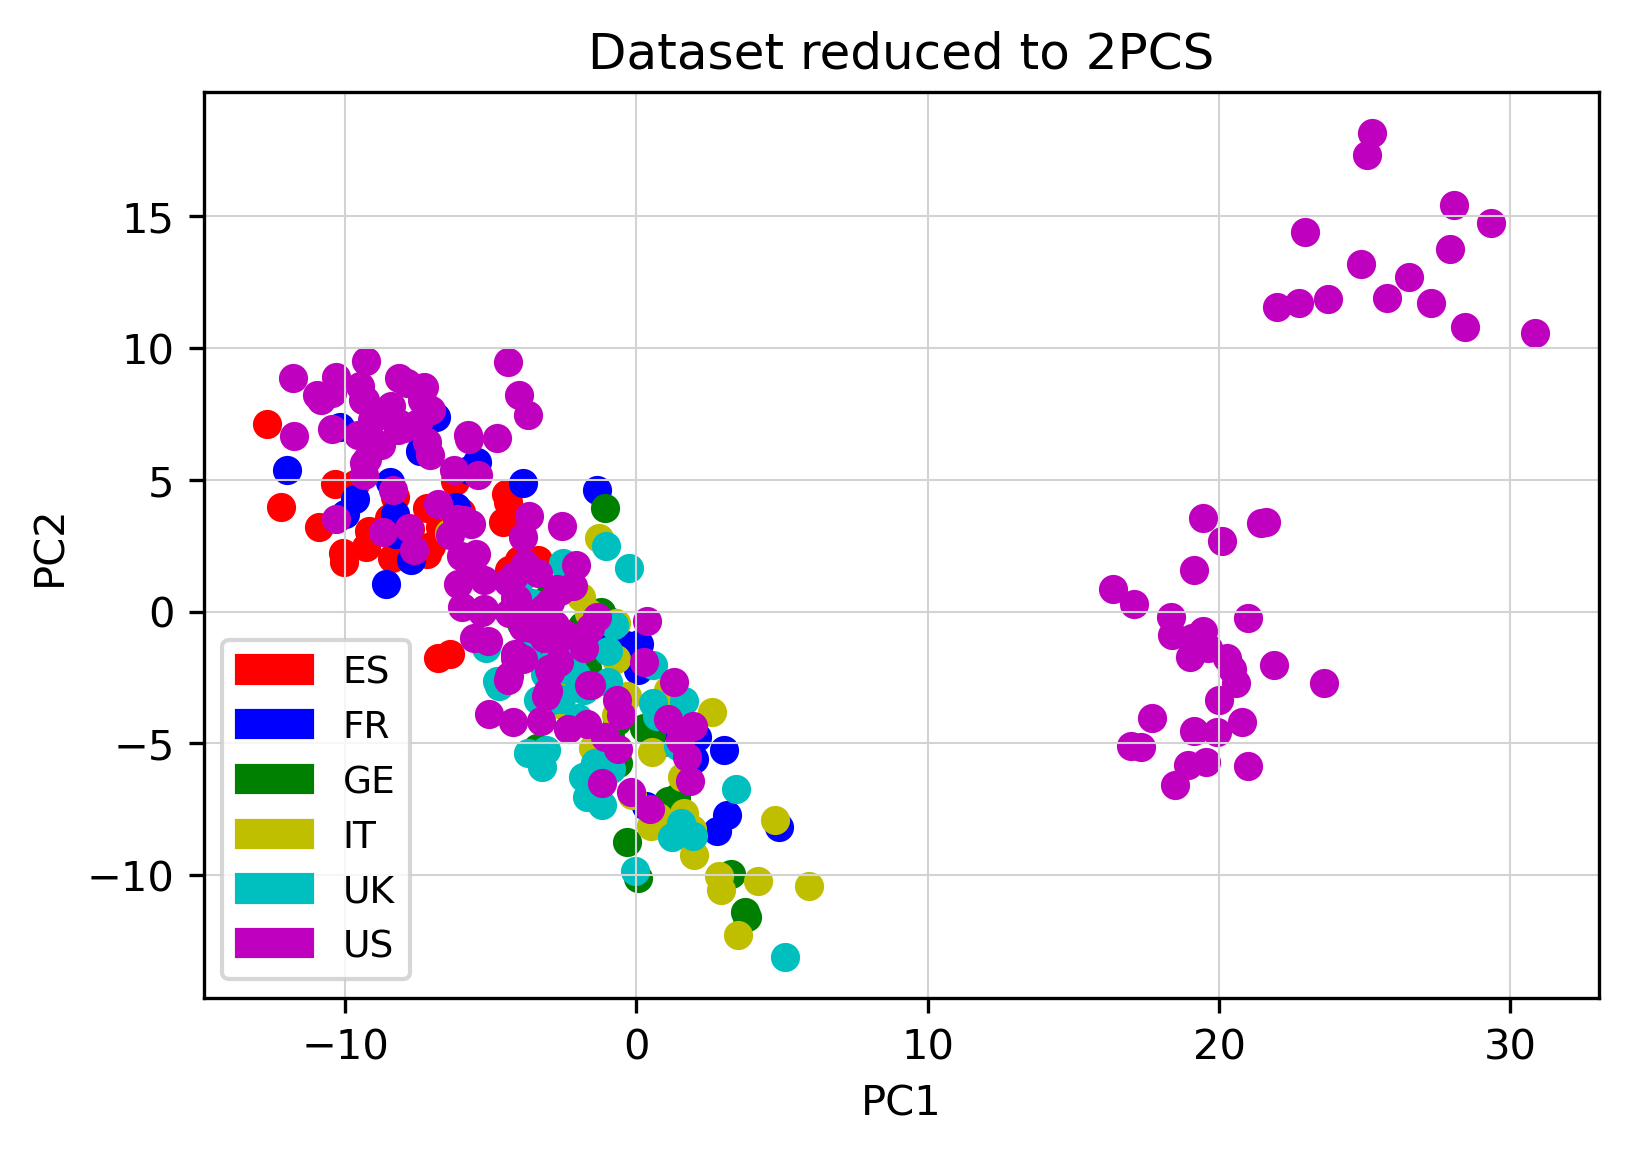

In [5]:
#languages array
languages = ['ES', 'FR', 'GE', 'IT', 'UK', 'US'] 
#colors array
colors = ['r','b','g','y','c','m']
 
#Plotting each example as a point where the x-axis corresponds to PC1 and y-axis to PC2.
x = np.zeros(values.shape[0])
z = np.zeros(values.shape[0])
for i in range(values.shape[0]):
    x[i] = values.iloc[i,::].T.dot(VT[0,::]) #Computation of principal component 1
    z[i] = values.iloc[i,::].T.dot(VT[1,::]) #Computation of principal component 1
    for j in range(len(languages)):
        if train_data_s.Y[i] == languages[j]:
            plt.scatter(x[i], z[i], c = colors[j])

#create legend
legend_dict = { 'ES' : 'r','FR' : 'b', 'GE' : 'g' ,'IT' : 'y','UK' : 'c', 'US' : 'm' }
patchList = []
for key in legend_dict:
        data_key = mpatches.Patch(color=legend_dict[key], label=key)
        patchList.append(data_key)

# Plot
plt.grid(color = 'lightgrey', linestyle = '-', linewidth = 0.5)
plt.legend(handles=patchList, loc='best', prop={'size': 9})
plt.savefig('legend.png', bbox_inches='tight')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Dataset reduced to 2PCS')
plt.show()

### Is the dataset linearly separable in the spaces defined by PC1 and PC2?

As we can see, by visual inspection the dataset is not linearly separable in the sapce defined by the two first PC. This is because we it is not possible to plot 6 straight lines that separate each color points from the others. 

## PART 2: Determining if the dataset is Linearly Separable in the original feature space 

In [6]:
## Intermediate functions

# Used to convert the vector y_hat = (Weight Matrix * example) to a softmax distribution vector.
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

# Function that transforms every value to -1 but the highest one.
# Used to convert hot encoded values with 1s and 0s to -1s and 1s
def Binary(arr):
    firstvalue=False
    for i in range(len(arr)):
        if (arr[i] < arr.max()).any():
            arr[i] = -1
        elif(firstvalue):
            arr[i] = -1
        else:
            arr[i] = 1
            firstvalue=True
    return arr

# Compares the hot encoded predictions with the hot encoded target to determine accuracy nºerrors. 
def Accuracy(prediction, truth):
    arc = []
    for i in range(329):
        ers = prediction[i,::] - truth[i,::]
        arc.append(ers)
    comparative = np.array(arc)
    errors = np.count_nonzero(comparative)/2
    accuracy = (1 - errors/truth.shape[0])*100
    return accuracy, errors

def count_errors(prediction, truth):
    arc = []
    for i in range(329):
        ers = prediction[i,::] - truth[i,::]
        arc.append(ers)
    comparative = np.array(arc)
    errors = np.count_nonzero(comparative)/2
    return errors  

In [7]:
## Multiclass perceptron.

# Requires to input dataset with bias included.
# values is the examples array
# target is the target array hot encoded.
# epochs is the number of iterations
# nfeatures is the number of features(bias counts as one feature here)
# Outputs weight matrix where each row is a weight vector for each class.
#It should have shuffling but I did not manage to get it correctly

def Perceptron(values,target,epochs,nfeatures):  
    epoch = 1
    W = np.random.random((6,nfeatures))    # Initialising the weights as random values
    for epoch in range(epochs):
        for i in range(values.shape[0]):   # Iterating over each example and the corresponding class label.           
            xi = values[i,0:nfeatures]     # Example i
            yi = target[i]                 # Corresponding target i     
            y_hat = np.sign(np.dot(W,np.array(xi))) 
            bins = Binary(softmax(y_hat))  # Using 'softmax' to convert to a distribution and then 'Binary' to hotencode it.
            index = np.where(yi == np.amax(yi)) # Index of the corresponding class of the target.
            predindex = np.where(bins == np.amax(bins)) #Index of the corresponding class of the predicted target
            if (predindex[0] != index[0]).any():                 
                W[index,::] += xi           # Updating weights
                W[predindex,::]-= xi                          
        epoch = epoch + 1                   # One iteration completed
    return W

In [8]:
# Runs perceptron and compute accuracies and number of errors.
# Inputs are the same as in the multiclass perceptron.

def experiment(values,target,epochs,nfeatures):
    W = Perceptron(values, target, epochs, nfeatures) 
    res = []
    for i in range(len(values)):
        bins = Binary(softmax(np.dot(W,values[i,::].T))) 
        res.append(bins)
    predictedclasses = np.array(res)
    return Accuracy(predictedclasses,target)[0], count_errors(predictedclasses,target)

In [9]:
#examples array
res = df.iloc[::,1:14]
bias = np.ones((len(df), 1))
X_traini = res.to_numpy()
X_train = np.hstack((bias,X_traini))

#target array hot encoded
Y_0_encoded = pd.get_dummies(df['Y']).to_numpy() #get_dummies converts not hot values to 0.We want -1
Y_encoded = np.where(Y_0_encoded >0, Y_0_encoded, -1)


In [10]:
experiment(X_train,Y_encoded,10,13)[0]

50.15197568389058

### Is the Dataset linearly separable in the original feature space?

No, the dataset is not linearly separable in the original feature space as the accuracy of the multiclass linear classifier is not 100% or very close to it. It has been tried to augment the number of iterations to see if this was a limiting factor; it was not.

## PART 3: Determining if the dataset is Linearly Separable in the feature space defined by the first 1 to 12 Principal Components.

In [11]:
#feature dataset
PCAstorage = values@np.diag(S)
bias = np.ones((len(df), 1))
PCAstorage.insert(0, "bias", bias)
PCA_train = PCAstorage.to_numpy()

In [12]:
#Target array one-hot encoded
PCAstorage.insert(13, "Y", target)
Y_0_encoded = pd.get_dummies(PCAstorage['Y']).to_numpy() #get_dummies converts not hot values to 0.We want -1
Y_encoded = np.where(Y_0_encoded >0, Y_0_encoded, -1)

In [13]:
PCA_train.shape

(329, 13)

In [14]:
# main
# Runs the experiment for top PC'S (always with bias).
results = []
for j in range(1, PCA_train.shape[1]): 
    expos = experiment(PCA_train[::,0:j],Y_encoded,10,j)[0]
    results.append(expos)

In [15]:
for element in range(len(results)):
    print(f"The accuracy for {element+1}PCs is {results[element]}")

The accuracy for 1PCs is 50.15197568389058
The accuracy for 2PCs is 50.15197568389058
The accuracy for 3PCs is 50.15197568389058
The accuracy for 4PCs is 50.15197568389058
The accuracy for 5PCs is 50.15197568389058
The accuracy for 6PCs is 50.15197568389058
The accuracy for 7PCs is 53.191489361702125
The accuracy for 8PCs is 50.455927051671736
The accuracy for 9PCs is 57.446808510638306
The accuracy for 10PCs is 61.39817629179332
The accuracy for 11PCs is 59.87841945288754
The accuracy for 12PCs is 59.87841945288754


### Is the dataset linearly separable in the feature space defined by the first 1 to 12 PCs?

Although the accuracy of the linear perceptron increases from aprox 48% to 60% when the number of PCs taken into account increaseas. The dataser is not linearly separable in any of these feature spaces.

## Part 4:Determining if the dataset is Linearly Separable in the feature space defined by non-linear PCA from 13d to 329d.

#### Kernel matrix

In [16]:
#Radial Basis function for two input vectors
def RBF_function(xi,xj,gamma):
    temp = xi-xj
    dist=(np.linalg.norm(temp))**2
    return np.exp(-gamma*dist)

#Computes the matrix K, where each entry (i,j)=Function(xi,xj)
def RBF_kernel(array,gamma):
    empty=np.zeros(shape=(array.shape[0],array.shape[0]))
    counter=0
    for i in array:
        counter2=0
        for j in array:
            empty[counter][counter2]=RBF_function(i,j,gamma)
            counter2+=1
        counter+=1
    return(empty)

#Function to normalize matrix K.
def normalization(K):
    A = np.full(shape = (K.shape[0], K.shape[0]), fill_value = 1/(K.shape[0]))
    AK = np.matmul(A,K) 
    KA = np.matmul(K,A)
    AKA = np.matmul(AK,A)
    KmenosAK = np.subtract(K,AK)
    lol = np.subtract(KmenosAK,KA)
    return np.add(lol,AKA)

#### GRID SEARCH

In [17]:
# Input a dataset and returnsthe lower bound and upper bound for gamma as a tuple.
def get_range(X):
    variances = np.zeros(X.shape[1])
    epsilon = 0.05
    for i in range(X.shape[1]):
        variances[i]=np.var(X[::,i])
    min_range = 1/(2*(np.max(variances)+epsilon))
    max_range = 1/(2*(np.min(variances)+epsilon))
    return min_range, max_range

# Array of the 7 possible values of gamma (step of 0.010).
gamma_vals = np.arange(get_range(X_traini)[0], get_range(X_traini)[1], step = 0.010)
print(gamma_vals)

[0.019205 0.029205 0.039205 0.049205 0.059205 0.069205 0.079205]


#### Running the projection on the dataset

In [18]:
E = []

In [19]:
#iteration over each gamma values and over each first 1 to i principal components.
for j in range(len(gamma_vals)):
    K_twidle = normalization(RBF_kernel(X_traini, gamma_vals[j]))
    U, S, VT = np.linalg.svd(K_twidle, full_matrices=True)
    lolo = np.matmul(K_twidle,VT)
    accuracies_KPCA = np.zeros(329)
    for i in range(0,329):
        accuracies_KPCA[i] = experiment(lolo,Y_encoded,10,329)[1]
    E.append(accuracies_KPCA)
full = np.array(E)

In [51]:
#errors array
errors = full[0:7, 13:329]
errors.T
gamma_vals

array([0.019205, 0.029205, 0.039205, 0.049205, 0.059205, 0.069205,
       0.079205])

In [52]:
nums = range(13,329)
rows  = list(map(str, nums))
columns = ['0.019205','0.029205','0.039205', '0.049205', '0.059205', '0.069205', '0.079205']

In [53]:
heat_df = pd.DataFrame(data=errors.T, index=rows, columns=columns)
heat_df

,0.019205,0.029205,0.039205,0.049205,0.059205,0.069205,0.079205
13,132.0,84.0,46.0,29.0,17.0,11.0,9.0
14,133.0,80.0,44.0,28.0,16.0,13.0,9.0
15,128.0,88.0,40.0,27.0,15.0,13.0,7.0
16,132.0,78.0,47.0,28.0,16.0,12.0,8.0
17,135.0,77.0,47.0,27.0,17.0,13.0,8.0
...,...,...,...,...,...,...,...
324,136.0,78.0,48.0,28.0,16.0,11.0,7.0
325,132.0,79.0,47.0,24.0,19.0,11.0,9.0
326,132.0,77.0,43.0,25.0,16.0,10.0,6.0
327,132.0,86.0,47.0,27.0,18.0,11.0,6.0


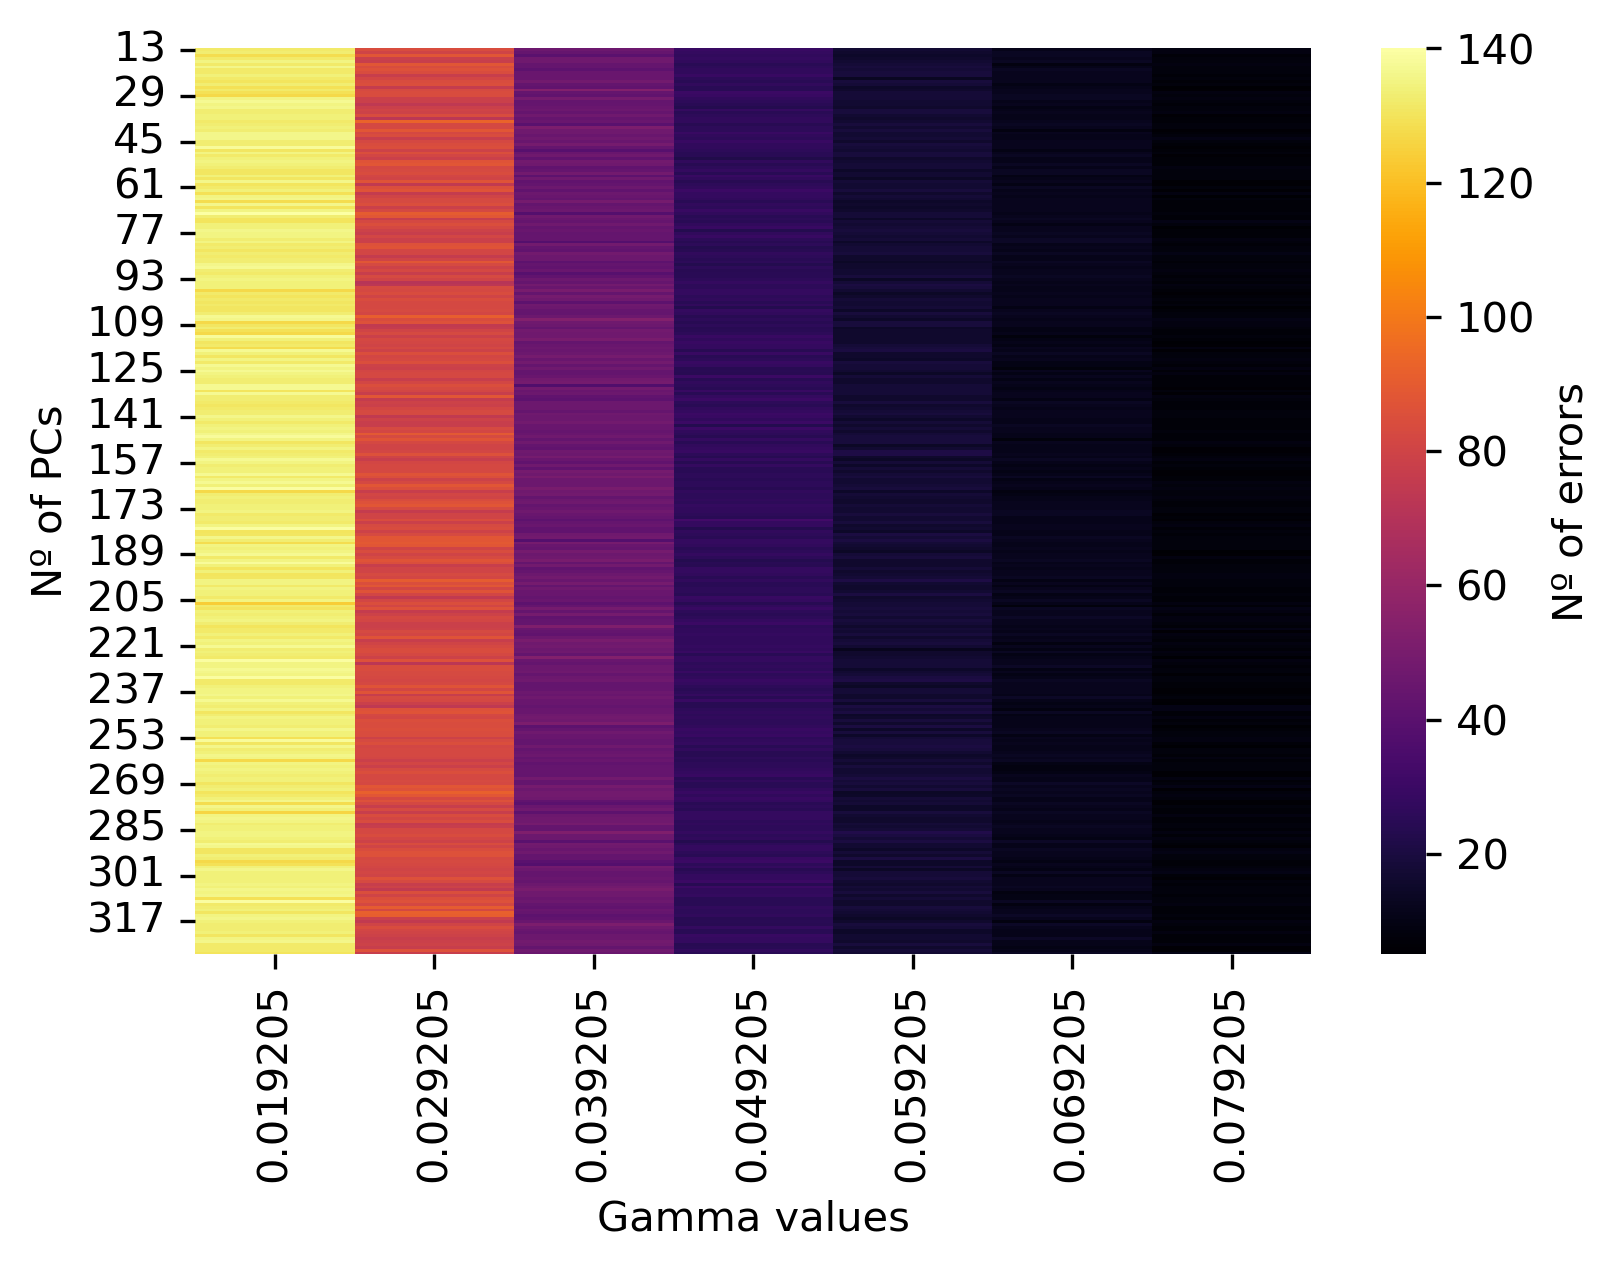

In [54]:
s = sns.heatmap(heat_df,cmap='inferno',cbar_kws={'label': 'Nº of errors'})
s.set_xlabel('Gamma values', fontsize=10)
s.set_ylabel('Nº of PCs', fontsize=10)
plt.show()

### Is the Dataset linearly separable in the feature space defined by non linear PCA?

We can see that this heat map indicates that the lower the gamma the lower the number of errors independently of the number of PCS. The errors range from 136 up to 6, indicating that the dataset would be linealy separable for 329 samples  (with more iterations or shiffling in the perceptron). This heat map is partially wrong as the the number of errors should decrease with more PCs and produce a smoother plot as the more PCs the more information provided. 